In [216]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime 
#import spotipy
#import spotipy.util as util

# normal cdf
from scipy.stats import norm


# linear regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for choosing covariates to include in model
from patsy import dmatrices

In [217]:
scope = 'playlist-read-private playlist-read-collaborative user-library-read user-read-recently-played user-top-read'
redirect_uri = "http://localhost/"
username = ""
client_id = ""
client_secret = ""

In [218]:
#data = pd.read_csv('topChartWithFeatures.csv')
data = pd.read_csv('streams_continuous.csv')

#dataset
data.head()


,Unnamed: 0,Unnamed: 0.1,Artist,Song,Rank,Streams,Date,Id,Duration,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
0,0,0,Post Malone,rockstar,1,1502394,2018-01-01,0e7ipj03S05BNilyu5bRzt,218147,4,159.801,5,0,0.129,0.585,0.520,0.12400,0.000070
1,1,1,G-Eazy,No Limit,2,1027039,2018-01-01,2DQ1ITjI0YoLFzuADN1ZBW,245387,4,175.957,1,1,0.405,0.838,0.771,0.01170,0.000000
2,2,2,Lil Pump,Gucci Gang,3,930620,2018-01-01,43ZyHQITOjhciSUUNPVRHc,124056,4,119.889,5,1,0.699,0.936,0.523,0.23900,0.000000
3,3,3,Cardi B,Bartier Cardi (feat. 21 Savage),4,877478,2018-01-01,0dIoGTQXDh1wVnhIiSyYEa,224285,4,138.015,1,1,0.109,0.908,0.524,0.00111,0.000678
4,4,4,Camila Cabello,Havana,5,860232,2018-01-01,1rfofaqEpACxVEHIZBJe6W,217307,4,104.988,2,1,0.394,0.765,0.523,0.18400,0.000036


In [219]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Rank,Streams,Duration,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
count,151601.000000,151601.000000,151601.000000,1.516010e+05,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000,151601.000000
mean,75800.000000,75800.000000,100.499344,4.156785e+05,199190.991511,3.958364,121.968125,5.376614,0.593894,0.448434,0.707267,0.599525,0.224544,0.006963
std,43763.583417,43763.583417,57.734871,2.984839e+05,46582.185873,0.392216,31.187651,3.682299,0.491106,0.203869,0.149032,0.159106,0.237183,0.049412
min,0.000000,0.000000,1.000000,1.578150e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37900.000000,37900.000000,50.000000,2.474270e+05,173800.000000,4.000000,97.062000,1.000000,0.000000,0.294000,0.620000,0.511000,0.040900,0.000000
50%,75800.000000,75800.000000,100.000000,3.128680e+05,197947.000000,4.000000,123.146000,6.000000,1.000000,0.437000,0.729000,0.603000,0.137000,0.000000
75%,113700.000000,113700.000000,150.000000,4.643890e+05,221543.000000,4.000000,144.111000,9.000000,1.000000,0.584000,0.809000,0.715000,0.331000,0.000007
max,151600.000000,151600.000000,200.000000,5.749019e+06,943529.000000,5.000000,232.690000,11.000000,1.000000,0.980000,0.980000,0.978000,0.994000,0.956000


In [220]:
data.shape

(151601, 18)

In [221]:
types = data.dtypes
#print(types)

In [222]:
data["Date"] = pd.to_datetime(data["Date"])
features = data[['Danceability', 'Energy', 'Duration', 'Acousticness', 'Key','Mode','Instrumentalness','Tempo', 'Time Signature']]

In [223]:
betternowdata = data.loc[data['Song']=='Better Now']
psychodata = data.loc[data['Song']=='Psycho (feat. Ty Dolla $ign)']



likeitdata = data.loc[data['Song']=='I Like It']
#target2 = data.loc[data['Rank']=1]
#print(likeitdata)
americadata=data.loc[data['Song']=='This Is America']
print(americadata)

       Unnamed: 0  Unnamed: 0.1            Artist             Song  Rank  \
25015       25015         25015  Childish Gambino  This Is America    16   
25200       25200         25200  Childish Gambino  This Is America     1   
25400       25400         25400  Childish Gambino  This Is America     1   
25600       25600         25600  Childish Gambino  This Is America     1   
25800       25800         25800  Childish Gambino  This Is America     1   
26000       26000         26000  Childish Gambino  This Is America     1   
26200       26200         26200  Childish Gambino  This Is America     1   
26400       26400         26400  Childish Gambino  This Is America     1   
26600       26600         26600  Childish Gambino  This Is America     1   
26800       26800         26800  Childish Gambino  This Is America     1   
27000       27000         27000  Childish Gambino  This Is America     1   
27200       27200         27200  Childish Gambino  This Is America     1   
27400       

In [224]:
#separate rank x, y
# date in yyyy/mm/dd format 
#old data 10/31/18


#train with one song, test on other song
date1=datetime.datetime(2018, 10, 31) 
likeitold = likeitdata.loc[likeitdata['Date']<=date1] 
#print(likeitold)
likeitnew = likeitdata.loc[likeitdata['Date']>date1]
#print(likeitnew)

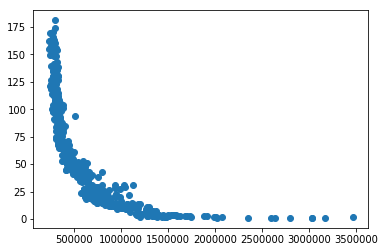

In [225]:
# Goal: Pick one song, predict rank next day(predict 10/27/19 using data from 4/6/18 to 10/26/19) )
#separate rank to x: before 10/27and y 
#2 similar songs 1 as train and 1 as test
#Features: date, last days rank(the day before rank), number of streams, song features 

#2 songs with similar dates
X=betternowdata[['Streams']].values
y=betternowdata[['Rank']].values
#Y=likeitnew[['Rank']]

plt.scatter(X, y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24e7ec88>]],
      dtype=object)

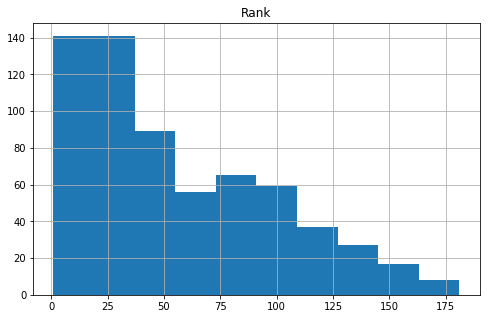

In [226]:

betternowdata.hist('Rank',figsize=(8,5))

In [227]:
##log transformation attempt 2
logy = np.log(y)
betternowdata['logrank'] = np.log(betternowdata['Rank'])
#betternowdata.hist('logrank',figsize=(8,5))





/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


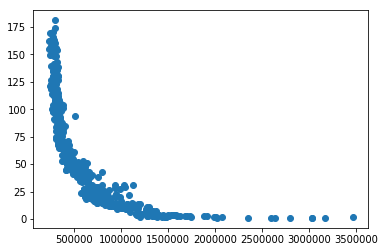

In [228]:
#log transformation
plt.scatter(X,y)

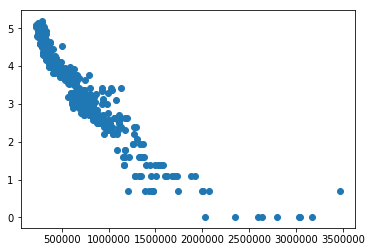

In [229]:
#plt.scatter (X, np.log(y))
plt.scatter (X, logy)

In [230]:
#logy=np.log(y)
model = sm.OLS(logy, X).fit()
Yhat = model.predict(X)

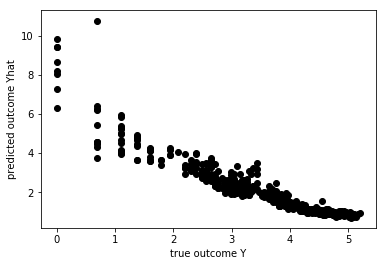

In [231]:
#plt.scatter(y, np.exp(Yhat),  color='black')
plt.scatter(logy, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

plt.show()

In [232]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     449.0
Date:                Sat, 02 May 2020   Prob (F-statistic):           7.04e-76
Time:                        21:03:13   Log-Likelihood:                -1581.9
No. Observations:                 640   AIC:                             3166.
Df Residuals:                     639   BIC:                             3170.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.107e-06   1.47e-07     21.189      0.000    2.82e-06     3.4e-06
==============================================================================
Omnibus:                      220.116   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              697.613
Skew:                          -1.657   Prob(JB):                    3.28e-152
Kurtosis:                       6.895   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
### log transformation w/o outliers

from scipy import stats
import numpy as np
#outliers once number of stream hit certain point, stays on rank 1
#seabornInstance.boxplot(logy) 


X=betternowdata[['Streams']].values
y=betternowdata[['Rank']].values

#logy = np.log(y)
betternowdata['logrank'] = np.log(betternowdata['Rank'])
logy= betternowdata[['logrank']].values


#betternowdata = betternowdata.drop(columns="Date")
betternowdata = betternowdata[['logrank', 'Rank','Streams']]

betternowdata.head()



/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,logrank,Rank,Streams
23201,0.693147,2,3467168
23400,0.000000,1,3029855
23600,0.000000,1,2632697
23800,0.000000,1,3169617
24000,0.000000,1,3034705


In [257]:
#remove outlier try2
z = np.abs(stats.zscore(betternowdata['logrank']))
#print(z)

threshold = 3
print(np.where(z > 3))

betternowoutlier = betternowdata.loc[z < 3]
#likeitold = likeitdata.loc[likeitdata['Date']<=date1] 

#betternowoutlier = betternowdata[(z < 3).all(axis=1)]
betternowoutlier.head()
betternowoutlier.shape

(array([26, 27, 28, 29, 30, 32]),)


(615, 3)


#remove outlier try1
#find outliers wiht z score
z = np.abs(stats.zscore(betternowdata))
print(z)


threshold = 3
#print(np.where(z > 3))
betternowdata.shape

betternowoutlier = betternowdata[(z < 3).all(axis=1)]
#betternowdata.head()
#betternowdata.shape 

In [258]:
X=betternowoutlier[['Streams']].values
y=betternowoutlier[['Rank']].values

#logy = np.log(y)
betternowoutlier['logrank'] = np.log(betternowoutlier['Rank'])
logy= betternowoutlier[['logrank']].values



/Users/kathy908000/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


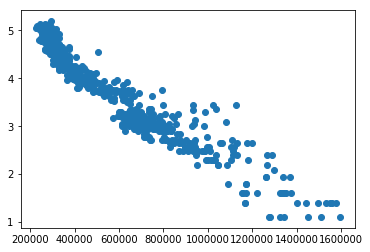

In [259]:
plt.scatter (X, logy)

In [264]:
#OSL
#model = sm.OLS(logy, X).fit()
#Yhat = model.predict(X)

In [266]:

lm = LinearRegression()
model = lm.fit(X,logy)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [271]:
Yhat = lm.predict(X)
print (lm.score(X,logy))
print (lm.coef_)
print (lm.intercept_)

0.9115541834883129
[[-2.96401318e-06]]
[5.42687861]


In [273]:
#plot_fit(Y, Yhat)

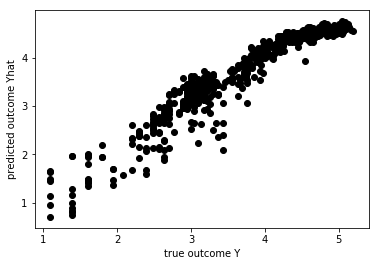

In [280]:
plt.scatter(logy, Yhat,  color='black')
plt.xlabel("true outcome Y")
plt.ylabel("predicted outcome Yhat")

plt.show()

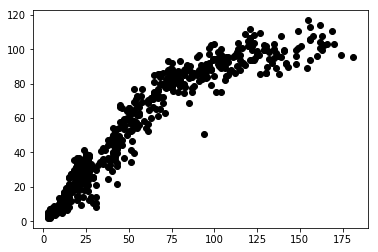

In [281]:
plt.scatter(y, np.exp(Yhat),  color='black')

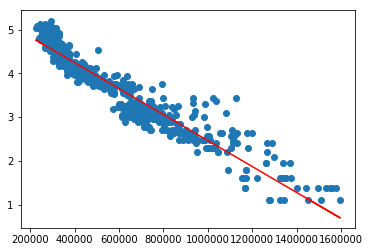

In [276]:
plt.scatter(X, logy)
plt.plot(X,Yhat,color='red')

In [64]:
## curve fit exponential decay 
import scipy as sp
import scipy.optimize

# Actual parameters
A0, K0, C0 = 2.5, -4.0, 2.0

# Generate some data based on these
tmin, tmax = 0, 0.5
num = 20
t = np.linspace(tmin, tmax, num)
y = model_func(t, A0, K0, C0)

# Add noise
noisy_y = y + 0.5 * (np.random.random(num) - 0.5)

# Non-linear Fit
A, K, C = fit_exp_nonlinear(t, noisy_y)
fit_y = model_func(t, A, K, C)
plt(ax1, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, C0))
ax1.set_title('Non-linear Fit')




RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [15]:
## curve fit, log transformation attempt 1
import scipy as sp
import scipy.optimize
from scipy.optimize import curve_fit

def exponential(x, a, b):
    return a*np.exp(b*x)


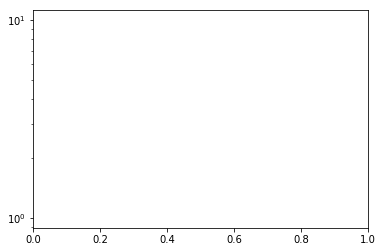

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Set the y-axis scaling to logarithmic
ax.set_yscale('log')

# Set the y-ticks
#ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10.0))
# Set the y-axis limits
#ax.set_ylim(0.1, 1000)

#ax.scatter(X,y)
#plt.yscale('log')


In [17]:
X =np.array(X)
y =np.array(y)
pars, cov = curve_fit(f=exponential, xdata=X,ydata= y)
#pars, cov = curve_fit(f=exponential, xdata=X, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))

#stdevs = np.sqrt(np.diag(cov))





ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [18]:
import scipy as sp
import scipy.optimize
from scipy.optimize import curve_fit

#replace x with t
def model_func(X, A, K, C):
    return A * np.exp(K * X) + C

def fit_exp_nonlinear(X, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, X, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C
    #print(A)
    #opt_parms, parm_cov.summary()

In [20]:
A0, K0, C0 = orig_parms
A, K, C = fit_parms

ax.plot(t, y, 'k--', label='Actual Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A0, K0, C0))
ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))
ax.plot(t, noisy_y, 'ro')
ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

NameError: name 'orig_parms' is not defined

In [ ]:
print(type(X))
#data=likeitdata.reshape((999,1))

In [ ]:
#linear regression 


#Next, we split 80% of the data to the training set 
#while 20% of the data to test set using below code.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

In [ ]:

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df
print(regressor.intercept_)
print(regressor.coef_)

In [ ]:
#better now, psycho post malone 
#y predict min =0, polynomial, building model with one song, 
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [ ]:
#actual rank vs predicted rank bar graph
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

#better now curve fit
import scipy as sp
import scipy.optimize


def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C

def plot(ax, t, y, noisy_y, fit_y, orig_parms, fit_parms):
    A0, K0, C0 = orig_parms
    A, K, C = fit_parms

    ax.plot(t, y, 'k--', 
      label='Actual Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A0, K0, C0))
    ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))
    ax.plot(t, noisy_y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)


In [ ]:
#save the conituous stream to csv file
#data.to_csv("streams_continuous.csv")

In [ ]:
#use the model to predict psycho

X=psychodata [['Streams']].values
y=psychodata [['Rank']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
#linear model not accurate because no negative rank. Use log transformaiton? poisson
#once number of streams reach certain threshold, rank stays around 1(plateau)

#test train based on time
date1=datetime.datetime(2018, 10, 31) 
#psychoold


X=psychodata [['Streams']].values
y=psychodata [['Rank']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

In [ ]:
# change in rank as y, polynomial (rank increasing or decreasing faster)

import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)


In [ ]:
plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.show()